# Prefácio

## O que é Data Science?

O Data Science está na interseção de:

- Habilidades de Hacker

- Conhecimento de estatística e matemática

- Especialidade no assunto

Ciência é sobre descoberta e criação de conhecimento.

http://drewconway.com/zia/2013/3/26/the-data-science-venn-diagram

# Capítulo 1

- Discussão sobre os dados em nossas vidas.

## Cientistas de Dados são:

- Um pouco estatístico e um pouco engenheiro de software.

- Alguém que extrai conhecimentos de dados desorganizados.

## Mãos a Obra

- Identificar os "conectores-chave" entre os cientistas de dados. 

- Lista de amigos para cada usuario

- Número médio de conexões

- As pessoas mais conectadas

- Grau de centralidade (identificar as pessoas que são centrais para a rede)

In [1]:
# Dados disponíveis

users = [
    { "id": 0, "name": "Hero" },
    { "id": 1, "name": "Dunn" },
    { "id": 2, "name": "Sue" },
    { "id": 3, "name": "Chi" },
    { "id": 4, "name": "Thor" },
    { "id": 5, "name": "Clive" },
    { "id": 6, "name": "Hicks" },
    { "id": 7, "name": "Devin" },
    { "id": 8, "name": "Kate" },
    { "id": 9, "name": "Klein" },
    { "id": 10, "name": "Jen" }
]

friendships = [(0, 1), (0, 2), (1, 2), (1, 3), (2, 3), (3, 4),
               (4, 5), (5, 6), (5, 7), (6, 8), (7, 8), (8, 9)]

interests = [
    (0, "Hadoop"), (0, "Big Data"), (0, "HBase"), (0, "Java"),
    (0, "Spark"), (0, "Storm"), (0, "Cassandra"),
    (1, "NoSQL"), (1, "MongoDB"), (1, "Cassandra"), (1, "HBase"),
    (1, "Postgres"), (2, "Python"), (2, "scikit-learn"), (2, "scipy"),
    (2, "numpy"), (2, "statsmodels"), (2, "pandas"), (3, "R"), (3, "Python"),
    (3, "statistics"), (3, "regression"), (3, "probability"),
    (4, "machine learning"), (4, "regression"), (4, "decision trees"),
    (4, "libsvm"), (5, "Python"), (5, "R"), (5, "Java"), (5, "C++"),
    (5, "Haskell"), (5, "programming languages"), (6, "statistics"),
    (6, "probability"), (6, "mathematics"), (6, "theory"),
    (7, "machine learning"), (7, "scikit-learn"), (7, "Mahout"),
    (7, "neural networks"), (8, "neural networks"), (8, "deep learning"),
    (8, "Big Data"), (8, "artificial intelligence"), (9, "Hadoop"),
    (9, "Java"), (9, "MapReduce"), (9, "Big Data")
]

salaries_and_tenures = [(83000, 8.7), (88000, 8.1),
                        (48000, 0.7), (76000, 6),
                        (69000, 6.5), (76000, 7.5),
                        (60000, 2.5), (83000, 10),
                        (48000, 1.9), (63000, 4.2)]

In [2]:
# ANTES
for user in users[:2]:
    print(user)

{'id': 0, 'name': 'Hero'}
{'id': 1, 'name': 'Dunn'}


In [3]:
# adicionando a chave friends para cada usuario e 
# colocando como valor uma lista vazia
for user in users:
    user['friends'] = []

In [4]:
# DEPOIS
for user in users[:2]:
    print(user)

{'id': 0, 'name': 'Hero', 'friends': []}
{'id': 1, 'name': 'Dunn', 'friends': []}


In [5]:
users[0]

{'id': 0, 'name': 'Hero', 'friends': []}

In [6]:
def find_user(_id):
    "devolve a posicao do usuario na lista"
    for i in range(len(users)):
        if users[i]["id"] == _id:
            return i
    return "user not found"

In [7]:
users[find_user(0)]

{'id': 0, 'name': 'Hero', 'friends': []}

In [8]:
find_user(13)

'user not found'

In [9]:
friendships[:3]

[(0, 1), (0, 2), (1, 2)]

In [10]:
for i, j in friendships:
    users[find_user(i)]["friends"].append(users[find_user(j)])
    users[find_user(j)]["friends"].append(users[find_user(i)])

In [11]:
def number_of_friends(user: dict):
    """retorna o numero de amigos do usuario"""
    return len(user["friends"])

In [12]:
total_conections = sum(number_of_friends(user) for user in users)
total_conections

24

In [13]:
num_users = len(users)
num_users

11

In [14]:
avg_connections = total_conections / num_users
avg_connections

2.1818181818181817

In [15]:
num_friends_by_id = [(user["id"], number_of_friends(user))
                     for user in users]

In [16]:
num_friends_by_id[0]

(0, 2)

In [17]:
sorted(num_friends_by_id, key=lambda x:x[1], reverse=True)

[(1, 3),
 (2, 3),
 (3, 3),
 (5, 3),
 (8, 3),
 (0, 2),
 (4, 2),
 (6, 2),
 (7, 2),
 (9, 1),
 (10, 0)]

In [18]:
from graphviz import Graph, Digraph

In [19]:
sorted(friendships, key=lambda x: x[0], reverse=True)

[(8, 9),
 (7, 8),
 (6, 8),
 (5, 6),
 (5, 7),
 (4, 5),
 (3, 4),
 (2, 3),
 (1, 2),
 (1, 3),
 (0, 1),
 (0, 2)]

In [20]:
g = Digraph('G', filename='digrafo_amizade.gv', engine = 'sfdp')
for i, j in sorted(friendships, key=lambda x: x[0], reverse=True):
    g.edge(str(i), str(j))
g.view()

'digrafo_amizade.gv.pdf'

In [21]:
g = Graph('G', filename='grafo_amizade.gv', engine = 'sfdp')
for i, j in sorted(friendships, key=lambda x: x[0], reverse=True):
    g.edge(str(i), str(j))
g.view()

'grafo_amizade.gv.pdf'

In [22]:
from graphviz import Graph
g = Graph('Conexoes_de_Amigos', comment = "Execricio_Pag5", filename = 'Conexoes_Amigos.gv', engine = 'sfdp')
for i, j in friendships:
    g.edge(str(i), str(j), color = "red", penwidth = "3.0")
g.view()

'Conexoes_Amigos.gv.pdf'

# Maos a Obra - Parte 2

- Cientistas de Dados Que Você Talvez Conheça



In [23]:
friendships

[(0, 1),
 (0, 2),
 (1, 2),
 (1, 3),
 (2, 3),
 (3, 4),
 (4, 5),
 (5, 6),
 (5, 7),
 (6, 8),
 (7, 8),
 (8, 9)]

In [24]:
lista_amigos_de_amigos = []
for _id in [x['id'] for x in users[0]['friends']]:
    lista_amigos_de_amigos.extend([x['id'] for x in users[_id]['friends']])

In [25]:
lista_amigos_de_amigos

[0, 2, 3, 0, 1, 3]

In [26]:
def friends_of_friend_ids_bad(user):
    return [foaf['id']
            for friend in user['friends']
            for foaf in friend['friends']]

In [27]:
friends_of_friend_ids_bad(users[0])

[0, 2, 3, 0, 1, 3]

In [28]:
def m_friends_of_friend_ids_bad(user):
    lista_amigos_de_amigos = []
    for _id in [x['id'] for x in users[user]['friends']]:
        lista_amigos_de_amigos.extend([x['id'] for x in users[_id]['friends']])
    return lista_amigos_de_amigos

In [29]:
friends_of_friend_ids_bad(users[0])

[0, 2, 3, 0, 1, 3]

In [30]:
[x['id'] for friend in users[0]['friends'] for x in friend['friends']]

[0, 2, 3, 0, 1, 3]

In [31]:
print([friend['id'] for friend in users[0]['friends']])
print([friend['id'] for friend in users[1]['friends']])
print([friend['id'] for friend in users[2]['friends']])

[1, 2]
[0, 2, 3]
[0, 1, 3]


In [32]:
def not_the_same(user, other_user):
    return user['id'] != other_user['id']

In [33]:
def not_friends(user, other_user):
    return all(not_the_same(friend, other_user) for friend in user["friends"])

In [34]:
from collections import Counter

In [35]:
def friends_of_friends_ids(user):
    return Counter(foaf['id']
                   for friend in user['friends']
                   for foaf in friend['friends']
                   if not_the_same(user, foaf)
                   and not_friends(user, foaf)) 

In [36]:
not_friends(users[2], users[4])

True

In [37]:
friends_of_friends_ids(users[0])

Counter({3: 2})

In [38]:
def m_friends_of_friends_ids(usuario):
    return Counter([x for x in friends_of_friend_ids_bad(usuario) if x not in [ amigo['id']
                      for amigo in usuario['friends']] and x != usuario['id']])


In [39]:
m_friends_of_friends_ids(users[3])

Counter({0: 2, 5: 1})

# Competência significativa

- Encontrar usuários com interesses similares

In [40]:
def data_scientists_who_like(target_interests):
    return [ x for x, y in interests if y == target_interests]

In [41]:
data_scientists_who_like('regression')

[3, 4]

In [42]:
from collections import defaultdict

In [43]:
user_ids_by_interest = defaultdict(list)
user_ids_by_interest

defaultdict(list, {})

In [44]:
interests[:3]

[(0, 'Hadoop'), (0, 'Big Data'), (0, 'HBase')]

In [45]:
for user_id, interest in interests:
    user_ids_by_interest[interest].append(user_id)

In [46]:
user_ids_by_interest['Java']

[0, 5, 9]

In [47]:
interests_by_user_id = defaultdict(list)

In [48]:
for user_id, interest in interests:
    interests_by_user_id[user_id].append(interest)

In [49]:
interests_by_user_id[2]

['Python', 'scikit-learn', 'scipy', 'numpy', 'statsmodels', 'pandas']

In [50]:
user_ids_by_interest['Java']

[0, 5, 9]

In [51]:
interests_by_user_id.keys()

dict_keys([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [52]:
usuarios_com_interesse = defaultdict(list) 
for user in users:
    print(user['id'], interests_by_user_id[user['id']])
    usuario = user['id']
    for interesse in interests_by_user_id[usuario]:
        usuarios_com_interesse[interesse].append(usuario) 

0 ['Hadoop', 'Big Data', 'HBase', 'Java', 'Spark', 'Storm', 'Cassandra']
1 ['NoSQL', 'MongoDB', 'Cassandra', 'HBase', 'Postgres']
2 ['Python', 'scikit-learn', 'scipy', 'numpy', 'statsmodels', 'pandas']
3 ['R', 'Python', 'statistics', 'regression', 'probability']
4 ['machine learning', 'regression', 'decision trees', 'libsvm']
5 ['Python', 'R', 'Java', 'C++', 'Haskell', 'programming languages']
6 ['statistics', 'probability', 'mathematics', 'theory']
7 ['machine learning', 'scikit-learn', 'Mahout', 'neural networks']
8 ['neural networks', 'deep learning', 'Big Data', 'artificial intelligence']
9 ['Hadoop', 'Java', 'MapReduce', 'Big Data']
10 []


Agora fica facil descobrir quem possui os maiores interesses em comum com um certo usuario.

-> usuario

-> [(pessoa, ranking), ]

Código do livro:

1. Itera sobre os interesses do usuário

2. Para cada interesse, itera sobre os outros usuarios com aquele interesse

3. Mantem a contagem de quantas vezes vemos cada usuario

In [53]:
Counter([2,3,4,4,4,5,5,6,6,6,6])

Counter({2: 1, 3: 1, 4: 3, 5: 2, 6: 4})

In [54]:
interests_by_user_id[usuario]

[]

In [55]:
usuario = 0
lista_ids_com_interesses_em_comum = []
for interesse in interests_by_user_id[usuario]:
     lista_ids_com_interesses_em_comum.extend(user_ids_by_interest[interesse])
    #print(user_ids_by_interest[interesse])
lista_ids_com_interesses_em_comum

[0, 9, 0, 8, 9, 0, 1, 0, 5, 9, 0, 0, 0, 1]

In [56]:
Counter([user for user in lista_ids_com_interesses_em_comum if user != usuario])
# teste
# pro usuario 0 recomende o 9
# pro usuario 1 recomende o 0
# pro usuario 2 recomende o 3, 5, 7
# pro usuario 3 recomende o 5, 6
            

Counter({9: 3, 8: 1, 1: 2, 5: 1})

In [57]:
def most_common_interests_with(user_id):
    return Counter([interested_user_id
                    for interest in interests_by_user_id[user_id]
                    for interested_user_id in user_ids_by_interest[interest]
                    if interested_user_id != user_id])

In [58]:
most_common_interests_with(0)

Counter({9: 3, 8: 1, 1: 2, 5: 1})

### Salarios


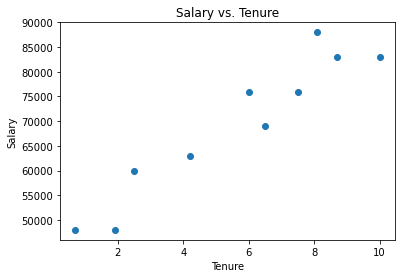

In [59]:
import matplotlib.pyplot as plt
import pandas as pd
df_salaries_and_tenures = pd.DataFrame(salaries_and_tenures)
df_salaries_and_tenures.index = df_salaries_and_tenures[1]
df_salaries_and_tenures.drop(columns = [1], inplace = True)
plt.scatter(df_salaries_and_tenures.index, df_salaries_and_tenures)
plt.title('Salary vs. Tenure') 
plt.ylabel('Salary')
plt.xlabel('Tenure')
plt.show()

In [60]:
salary_by_tenure = defaultdict(list)

In [61]:
for salary, tenure in salaries_and_tenures:
    salary_by_tenure[tenure].append(salary)

In [62]:
salary_by_tenure

defaultdict(list,
            {8.7: [83000],
             8.1: [88000],
             0.7: [48000],
             6: [76000],
             6.5: [69000],
             7.5: [76000],
             2.5: [60000],
             10: [83000],
             1.9: [48000],
             4.2: [63000]})

In [63]:
avarage_salary_by_tenure = {
    tenure : sum(salaries) / len(salaries)
    for tenure, salaries in salary_by_tenure.items()
}

In [64]:
avarage_salary_by_tenure

{8.7: 83000.0,
 8.1: 88000.0,
 0.7: 48000.0,
 6: 76000.0,
 6.5: 69000.0,
 7.5: 76000.0,
 2.5: 60000.0,
 10: 83000.0,
 1.9: 48000.0,
 4.2: 63000.0}

In [65]:
def tenure_bucket(tenure):
    if tenure < 2:
        return "less than two"
    elif tenure < 5:
        return "between two and five"
    else:
        return 'more than five'

In [66]:
salary_by_tenure_bucket = defaultdict(list)
for salary, tenure in salaries_and_tenures:
    bucket = tenure_bucket(tenure)
    salary_by_tenure_bucket[bucket].append(salary)

In [67]:
salary_by_tenure_bucket

defaultdict(list,
            {'more than five': [83000, 88000, 76000, 69000, 76000, 83000],
             'less than two': [48000, 48000],
             'between two and five': [60000, 63000]})

In [68]:
avarage_salary_by_bucket = {
    tenure_bucket : sum(salaries) / len(salaries)
    for tenure_bucket, salaries in salary_by_tenure_bucket.items()
}

In [69]:
avarage_salary_by_bucket

{'more than five': 79166.66666666667,
 'less than two': 48000.0,
 'between two and five': 61500.0}

In [70]:
def predict_paid_or_unpaid(years_experience):
    p, u = 'paid', 'unpaid'
    if years_experience < 3:
        return p
    elif years_experience < 8.5:
        return u
    else:
        return p

In [71]:
interests_by_user_id.keys()    

dict_keys([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10])

In [72]:
user_ids_by_interest.keys()

dict_keys(['Hadoop', 'Big Data', 'HBase', 'Java', 'Spark', 'Storm', 'Cassandra', 'NoSQL', 'MongoDB', 'Postgres', 'Python', 'scikit-learn', 'scipy', 'numpy', 'statsmodels', 'pandas', 'R', 'statistics', 'regression', 'probability', 'machine learning', 'decision trees', 'libsvm', 'C++', 'Haskell', 'programming languages', 'mathematics', 'theory', 'Mahout', 'neural networks', 'deep learning', 'artificial intelligence', 'MapReduce'])

In [73]:
ranking_interesse = []
for interesse in user_ids_by_interest:
    ranking_interesse.append((interesse, len(user_ids_by_interest[interesse])))
ranking_interesse.sort(key=lambda x: x[1], reverse=True)

In [74]:
palavras = []
for _, frase in interests:
    palavras.extend(frase.split())
Counter(x.lower() for x in palavras).most_common()

[('big', 3),
 ('data', 3),
 ('java', 3),
 ('python', 3),
 ('learning', 3),
 ('hadoop', 2),
 ('hbase', 2),
 ('cassandra', 2),
 ('scikit-learn', 2),
 ('r', 2),
 ('statistics', 2),
 ('regression', 2),
 ('probability', 2),
 ('machine', 2),
 ('neural', 2),
 ('networks', 2),
 ('spark', 1),
 ('storm', 1),
 ('nosql', 1),
 ('mongodb', 1),
 ('postgres', 1),
 ('scipy', 1),
 ('numpy', 1),
 ('statsmodels', 1),
 ('pandas', 1),
 ('decision', 1),
 ('trees', 1),
 ('libsvm', 1),
 ('c++', 1),
 ('haskell', 1),
 ('programming', 1),
 ('languages', 1),
 ('mathematics', 1),
 ('theory', 1),
 ('mahout', 1),
 ('deep', 1),
 ('artificial', 1),
 ('intelligence', 1),
 ('mapreduce', 1)]

In [75]:
words_and_counts = Counter(word for user, interest in interests
                                for word in interest.lower().split())
words_and_counts.most_common()

[('big', 3),
 ('data', 3),
 ('java', 3),
 ('python', 3),
 ('learning', 3),
 ('hadoop', 2),
 ('hbase', 2),
 ('cassandra', 2),
 ('scikit-learn', 2),
 ('r', 2),
 ('statistics', 2),
 ('regression', 2),
 ('probability', 2),
 ('machine', 2),
 ('neural', 2),
 ('networks', 2),
 ('spark', 1),
 ('storm', 1),
 ('nosql', 1),
 ('mongodb', 1),
 ('postgres', 1),
 ('scipy', 1),
 ('numpy', 1),
 ('statsmodels', 1),
 ('pandas', 1),
 ('decision', 1),
 ('trees', 1),
 ('libsvm', 1),
 ('c++', 1),
 ('haskell', 1),
 ('programming', 1),
 ('languages', 1),
 ('mathematics', 1),
 ('theory', 1),
 ('mahout', 1),
 ('deep', 1),
 ('artificial', 1),
 ('intelligence', 1),
 ('mapreduce', 1)]

# Capítulo 2 - Curso Relâmpago de Python


In [76]:
import this

The Zen of Python, by Tim Peters

Beautiful is better than ugly.
Explicit is better than implicit.
Simple is better than complex.
Complex is better than complicated.
Flat is better than nested.
Sparse is better than dense.
Readability counts.
Special cases aren't special enough to break the rules.
Although practicality beats purity.
Errors should never pass silently.
Unless explicitly silenced.
In the face of ambiguity, refuse the temptation to guess.
There should be one-- and preferably only one --obvious way to do it.
Although that way may not be obvious at first unless you're Dutch.
Now is better than never.
Although never is often better than *right* now.
If the implementation is hard to explain, it's a bad idea.
If the implementation is easy to explain, it may be a good idea.
Namespaces are one honking great idea -- let's do more of those!


In [77]:
[1, 3,
 4, 5,    6 ,   7,
 8 , 888]

[1, 3, 4, 5, 6, 7, 8, 888]

In [78]:
import re

In [79]:
my_regex = re.compile("[0-9]+", re.I)
my_regex

re.compile(r'[0-9]+', re.IGNORECASE|re.UNICODE)

In [80]:
5/2

2.5

In [81]:
5//2

2

In [82]:
# exemplo de funcao de primeira classe
def apply_to_one(f):
    return f(1)

In [83]:
def retorno_1(x):
    return x + 1

In [84]:
retorno_1(3)

4

In [85]:
apply_to_one(retorno_1)

2

In [86]:
def double(x):
    return x * 2

In [87]:
double(1)

2

In [88]:
my_double = double

In [89]:
my_double(3)

6

In [90]:
x = apply_to_one(my_double)

In [91]:
x

2

In [92]:
def triple(x=5):
    return x * 3

In [93]:
triple(1)

3

In [94]:
apply_to_one(triple)

3

In [95]:
another_double = lambda x: x * 2

In [96]:
another_double(2)

4

In [97]:
def another_double(x):
    return x * 2

In [98]:
another_double(2)

4

In [99]:
triple()

15

In [100]:
string = r'o\i'

In [101]:
string

'o\\i'

In [102]:
string2 = 'a\tb'

In [103]:
print(string2)

a	b


In [104]:
1, 3

(1, 3)

In [105]:
from collections import defaultdict

In [106]:
teste_dict = defaultdict(int)

In [107]:
teste_dict['teste']

0

In [108]:
teste_dict = defaultdict(list)
teste_dict['teste']

[]

In [109]:
teste_dict = defaultdict(dict)
teste_dict['teste']

{}

In [110]:
teste_dict = defaultdict(lambda: [1,1])
teste_dict['teste']

[1, 1]

In [111]:
dict_normal = {}

In [112]:
try:
    dict_normal['teste']
except:
    print('algum erro aconteceu aqui')

algum erro aconteceu aqui


In [113]:
dict_normal['0'] = 1

In [114]:
dict_normal['1'] = 1

In [115]:
dict_normal['2'] = 1

In [116]:
dict_normal['3'] = 1

In [117]:
dict_normal['5'] = 1

In [118]:
dict_normal['4'] = 1

In [119]:
for chave in dict_normal:
    print(chave)

0
1
2
3
5
4


In [120]:
tamanho = int(10e5)

In [121]:
%%timeit
a = 0
for i in range(tamanho):
    a += i

372 ms ± 137 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [122]:
conju = set(range(tamanho))

In [123]:
%%timeit
a = 0
for i in conju:
    a += i

222 ms ± 45.3 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [124]:
lista = list(range(tamanho))

In [125]:
%%timeit
a = 0
for i in lista:
    a += i

200 ms ± 22.2 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [126]:
tamanho

1000000

In [127]:
alvo = 999999

In [128]:
%%timeit
alvo in lista

55.1 ms ± 18.6 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [129]:
%%timeit
alvo in range(tamanho)

1.21 µs ± 150 ns per loop (mean ± std. dev. of 7 runs, 1000000 loops each)


In [130]:
%%timeit
alvo in conju

269 ns ± 58.9 ns per loop (mean ± std. dev. of 7 runs, 1000000 loops each)


## Conjuntos

In [131]:
s = set()

In [132]:
s.add(1)

In [133]:
s

{1}

In [134]:
s.add(2)

In [135]:
s

{1, 2}

In [136]:
s.add(2)

In [137]:
s

{1, 2}

In [138]:
x = 0
y = 2
'verdadeiro' if x == y else 'falso'

'falso'

In [139]:
for i in range(4):
    if i == 2:
        break
    print(i)

0
1


In [140]:
for i in range(4):
    if i == 2:
        continue
    print(i)

0
1
3


In [141]:
for i in range(4):
    if i == 2:
        pass
    print(i)

0
1
2
3


In [142]:
None == False

False

In [143]:
[] == False

False

In [144]:
1 == True

True

In [145]:
[1,2,3] == True

False

In [146]:
10 == True

False

In [147]:
0 == False

True

In [148]:
-1 == True

False

In [149]:
isinstance(-1, int)

True

In [150]:
isinstance(1, bool)

False

In [151]:
isinstance(0, bool)

False

In [152]:
isinstance(True, int)

True

In [153]:
isinstance(False, int)

True

In [154]:
0 is False

<>:1: SyntaxWarning: "is" with a literal. Did you mean "=="?
<>:1: SyntaxWarning: "is" with a literal. Did you mean "=="?
<ipython-input-154-808c2f2e0e8d>:1: SyntaxWarning: "is" with a literal. Did you mean "=="?
  0 is False


False

In [155]:
id(0)

94813888281824

In [156]:
id(False)

94813887998208

In [157]:
1 is True

<>:1: SyntaxWarning: "is" with a literal. Did you mean "=="?
<>:1: SyntaxWarning: "is" with a literal. Did you mean "=="?
<ipython-input-157-63176c6536ac>:1: SyntaxWarning: "is" with a literal. Did you mean "=="?
  1 is True


False

In [158]:
0.0 == False

True

In [159]:
s = "a"

In [160]:
s = "a"
teste = s and s[0]
teste

'a'

In [161]:
s = []
1 or s[0]

1

In [162]:
s = ""
teste = s and s[0]
teste

''

In [163]:
#s = ""
#teste = s or s[0]
#teste

In [164]:
s = "a"
teste = s or s[0]
teste

'a'

In [165]:
10 and 20

20

In [166]:
0 and 20

0

In [167]:
10 | 20

30

In [168]:
bin(10)

'0b1010'

In [169]:
bin(20)

'0b10100'

In [170]:
int('011110',2)

30

In [171]:
10 or 20

10

In [172]:
dicionario = {'a':10, 'b':20, 'c': 30}

In [173]:
[ c for x in dicionario.items() for c in x if type(c) == int]

[10, 20, 30]

In [174]:
for x in dicionario.items():
    for c in x:
        print(c)

a
10
b
20
c
30


In [175]:
a = -1
b = True
a == b

False

In [176]:
isinstance(0, bool)

False

In [177]:
s = []
0 and s[0]

0

In [178]:
1 is True

<>:1: SyntaxWarning: "is" with a literal. Did you mean "=="?
<>:1: SyntaxWarning: "is" with a literal. Did you mean "=="?
<ipython-input-178-63176c6536ac>:1: SyntaxWarning: "is" with a literal. Did you mean "=="?
  1 is True


False

# Compreensão de Lista


In [179]:
even_numbers = [x for x in range(5) if x % 2 == 0]
even_numbers

[0, 2, 4]

In [180]:
squares = [x * x for x in range(5)]
squares

[0, 1, 4, 9, 16]

In [181]:
even_squares = [x * x for x in even_numbers]
even_squares

[0, 4, 16]

In [182]:
square_dict = { str(x) : x * x for x in range(5) }
square_dict

{'0': 0, '1': 1, '2': 4, '3': 9, '4': 16}

In [183]:
square_set = { x * x for x in [1, -1]}
square_set

{1}

In [184]:
zeros = [0 for _ in even_numbers]
zeros

[0, 0, 0]

In [185]:
pairs = [(x,y)
         for x in range(3)
         for y in range(3)]

In [186]:
pairs[0]

(0, 0)

In [187]:
list(range(10))

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

In [188]:
type(pairs[0])

tuple

In [189]:
increasing_pairs = [(x,y)
                    for x in range(10)
                    for y in range(x + 1, 10)]

In [190]:
increasing_pairs

[(0, 1),
 (0, 2),
 (0, 3),
 (0, 4),
 (0, 5),
 (0, 6),
 (0, 7),
 (0, 8),
 (0, 9),
 (1, 2),
 (1, 3),
 (1, 4),
 (1, 5),
 (1, 6),
 (1, 7),
 (1, 8),
 (1, 9),
 (2, 3),
 (2, 4),
 (2, 5),
 (2, 6),
 (2, 7),
 (2, 8),
 (2, 9),
 (3, 4),
 (3, 5),
 (3, 6),
 (3, 7),
 (3, 8),
 (3, 9),
 (4, 5),
 (4, 6),
 (4, 7),
 (4, 8),
 (4, 9),
 (5, 6),
 (5, 7),
 (5, 8),
 (5, 9),
 (6, 7),
 (6, 8),
 (6, 9),
 (7, 8),
 (7, 9),
 (8, 9)]

In [191]:
(9,)

(9,)

# Geradores e Iteradores

yield == produzir

In [192]:
def lazy_range(n):
    i = 0
    while i < n:
        yield i
        i += 1

In [193]:
for i in lazy_range(10):
    print(i)

0
1
2
3
4
5
6
7
8
9


In [194]:
var_func = lazy_range(10) 

In [195]:
next(var_func)

0

In [196]:
class Teste:
    
    def __init__(self, x, y):
        self.x = x
        self.y = y
        
    def __add__(self, x):
        return "nao vou somar"
    

In [197]:
import random

# Ferramentas Funcionais

In [198]:
def exp(base, power):
    return base ** power

In [199]:
exp(2,3)

8

In [200]:
dois_elevado = lambda x: exp(2, x)

In [201]:
dois_elevado(3)

8

In [202]:
from functools import partial

In [203]:
two_to_the = partial(exp, 2)

In [204]:
two_to_the(3)

8

In [205]:
def double(x):
    return x * 2

In [206]:
xs = [1, 2, 3, 4]

In [207]:
[ double(x) for x in xs ]

[2, 4, 6, 8]

In [208]:
list(map(double, xs))

[2, 4, 6, 8]

In [209]:
def multiply(x, y): return x * y

In [210]:
products = map(multiply, [1,2,3], [4,5,10])
list(products)

[4, 10, 30]

In [211]:
from functools import reduce

In [212]:
# reduzir a lista multiplicando os elementos
x_product = reduce(multiply, xs)

In [213]:
x_product

24

In [214]:
# for i in range(len(documents)): do_something(i)

In [215]:
# for i, _ in enumerate(documents): do_something(i)

In [216]:
list(zip([1,2,3],['a', 'b', 'c']))

[(1, 'a'), (2, 'b'), (3, 'c')]

In [217]:
for n, l in zip([1,2],['a', 'b', 'c']):
    print(n)

1
2


In [218]:
depois = list(zip([1,2,3],['a', 'b', 'c']))
depois

[(1, 'a'), (2, 'b'), (3, 'c')]

In [219]:
antes1, antes2 = zip(*depois)

In [220]:
antes1

(1, 2, 3)

In [221]:
antes2

('a', 'b', 'c')

In [222]:
def funcao_teste(*um_elemento):
    print(um_elemento)

In [223]:
funcao_teste(1, 2)

(1, 2)


In [224]:
a, *_ = antes2

In [225]:
a

'a'

In [226]:
_

['b', 'c']

In [227]:
teste = [1,2,3,4,5]

In [228]:
primeiro, *_, ultimo = teste

In [229]:
primeiro

1

In [230]:
ultimo

5

In [231]:
_

[2, 3, 4]

In [232]:
def add(a, b): return a + b

In [233]:
add(1,2)

3

In [234]:
# add([1,2])

In [235]:
add(*[1,2])

3

In [236]:
dia, mes, ano = '01/12/2012'.split('/')

In [237]:
dia

'01'

In [238]:
mes

'12'

In [239]:
*outro, ano = '01/12/2012'.split('/')

In [240]:
ano

'2012'

In [241]:
outro

['01', '12']

In [242]:
def doubler(f):
    def g(x):
        return 2 * f(x)
    return g

In [243]:
def f1(x):
    return x + 1

In [244]:
h = doubler(f1)

In [245]:
type(h)

function

In [246]:
doubler(f1)(3)

8

In [247]:
dict_dados = {'nome': "caio", 'idade':34}

In [248]:
def print_dados(nome, idade):
    print(f'o nome é {nome} e a idade é {idade}')

In [249]:
print_dados('Debs', 31)

o nome é Debs e a idade é 31


In [250]:
print_dados(idade=31, nome='Debs')

o nome é Debs e a idade é 31


In [251]:
print_dados(**dict_dados)

o nome é caio e a idade é 34


# Visualizando Dados

In [252]:
import matplotlib.pyplot as plt

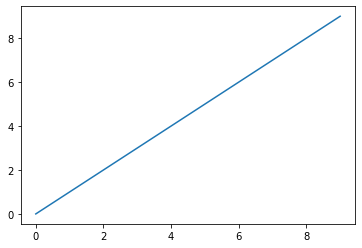

In [253]:
plt.plot(range(10), range(10));

# Álgebra Linear

In [254]:
vetor1 = [1, 2, 4]

In [255]:
vetor2 = [2, 4, 6]

In [256]:
vetor1 + vetor2

[1, 2, 4, 2, 4, 6]

In [257]:
import numpy as np

In [258]:
np_vetor1 = np.array(vetor1)
np_vetor1

array([1, 2, 4])

In [259]:
np_vetor2 = np.array(vetor2)
np_vetor2

array([2, 4, 6])

In [260]:
np_vetor1 + np_vetor2

array([ 3,  6, 10])

In [261]:
def vector_add(v, w):
    """ soma elementos correspondentes """
    return [v_i + w_i for v_i, w_i in zip(v,w)]

In [262]:
vector_add(vetor1, vetor2)

[3, 6, 10]

In [263]:
def vector_subtract(v, w):
    """ soma elementos correspondentes """
    return [v_i - w_i for v_i, w_i in zip(v,w)]

In [264]:
vector_subtract(vetor1, vetor2)

[-1, -2, -2]

In [265]:
np_vetor1 - np_vetor2

array([-1, -2, -2])

In [266]:
np_vec = np.array([range(3) for i in range(3)])
np_vec

array([[0, 1, 2],
       [0, 1, 2],
       [0, 1, 2]])

In [267]:
%%timeit
np_vec.sum(axis=0)

8.44 µs ± 918 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


In [268]:
def vector_sum(vectors):
    """soma todos os elementos correspondentes"""
    result = vectors[0]
    for vector in vectors[1:]:
        result = vector_add(result, vector)
    
    return result

In [269]:
lista_de_vetores = [list(range(3)) for i in range(3)]
lista_de_vetores

[[0, 1, 2], [0, 1, 2], [0, 1, 2]]

In [270]:
%%timeit
vector_sum(lista_de_vetores)

4.12 µs ± 230 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


In [271]:
def vector_sum(vectors):
    return reduce(vector_add, vectors)

In [272]:
from functools import reduce, partial

In [273]:
%%timeit
vector_sum(lista_de_vetores)

3.69 µs ± 337 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


In [274]:
vector_sum = partial(reduce, vector_add)

In [275]:
%%timeit
vector_sum(lista_de_vetores)

3.51 µs ± 210 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


In [276]:
def scalar_multiply(c, v):
    """c é um número, v é um vetor"""
    return [c * v_i for v_i in v]

In [277]:
def vector_mean(vectors):
    """computar o vetor cujo i-esimo elemento seja a media dos
    i-esimos elementos dos vetores inclusos"""
    n = len(vectors)
    return scalar_multiply(1/n, vector_sum(vectors))

In [278]:
vector_mean([[1,2,3],[3,2,1]])

[2.0, 2.0, 2.0]

In [279]:
def dot(v,w):
    """v_1, * w_1 + ... + v_n * w_n """
    return sum(v_i * w_i for v_i, w_i in zip(v,w)) 

In [280]:
dot([1.0, 0.0, 1.0], [0.5, 0.3, -0.7])

-0.19999999999999996

In [281]:
# tem covid
[1.0, 0.0, 1.0]

[1.0, 0.0, 1.0]

In [282]:
[0.5, 0.3, -0.7]

[0.5, 0.3, -0.7]

In [283]:
0.5 + 0.0 - 0.7 

-0.19999999999999996

In [284]:
def sum_of_squares(v):
    return dot(v, v)

In [285]:
import math

In [286]:
def magnitude(v):
    
    return math.sqrt(sum_of_squares(v))

In [287]:
magnitude([1.0, 0.0, 1.0])

1.4142135623730951

In [288]:
def squared_distance(v, w):
    """(v_1 - w_1) ** 2 + ... + (v_n - w_n) ** 2"""
    return sum_of_squares(vector_subtract(v, w))

In [289]:
squared_distance([0,0], [3,4])

25

In [290]:
def distance(v, w):
    return math.sqrt(squared_distance(v,w))

In [291]:
distance([0,0], [3,4])

5.0

In [292]:
distance([0,0], [2,2])

2.8284271247461903

In [293]:
A = [[1, 2, 3],
     [4, 5, 6]]

In [294]:
B = [[1, 2],
     [3, 4], 
     [5, 6]]

In [295]:
len(A)

2

In [296]:
len(B)

3

In [297]:
len(A[0])

3

In [298]:
def shape(A):
    num_rows = len(A)
    num_cols = len(A[0]) if A else 0
    return num_rows, num_cols

In [299]:
shape(A)

(2, 3)

In [300]:
# n linhas
# k colunas
# linhas x colunas

In [301]:
def get_row(A, i):
    return A[i]

In [302]:
def get_column(A, j):
    return [A_i[j] 
           for A_i in A]

In [303]:
B

[[1, 2], [3, 4], [5, 6]]

In [304]:
get_row(B, 1)

[3, 4]

In [305]:
get_column(B, 0)

[1, 3, 5]

In [306]:
def make_matrix(num_rows, num_cols, entry_fn):
    """retorna a matriz num_rows X num_cols
    cuja entrada (i,j)th é entry_fn(i, j)"""
    
    return [[entry_fn(i, j)
             for j in range(num_cols)]
            for i in range(num_rows)]

In [307]:
def is_diagonal(i, j):
    """1's na diagonal, 0,s nos demais lugares"""
    return 1 if i == j else 0


In [308]:
make_matrix(3, 3, is_diagonal)

[[1, 0, 0], [0, 1, 0], [0, 0, 1]]

In [309]:
data = [[70, 170, 40],
        [65, 120, 26],]

In [310]:
# complexidade de algoritmo

In [311]:
nomes = ['nome1', 'nome2', 'nome2']

In [312]:
'nome1' in nomes # complexidade O(n) # big O notation

True

In [313]:
relacoes_de_amizade = [(1, 0), (32, 18), (19, 20)]

In [314]:
matrix_amizade = [[1,0,1], [0,1,1], [0,0,0]]

In [315]:
matrix_amizade

[[1, 0, 1], [0, 1, 1], [0, 0, 0]]

In [316]:
matrix_amizade[2][1] # O(1) 

0

# Estatistica

Uma forma de destilar e comunicar os aspectos relevantes dos nossos dados.

In [317]:
import random

In [318]:
from collections import Counter

In [319]:
num_friends = [random.choice(range(1,101)) for i in range(204)]
friends_counts = Counter(num_friends)


In [320]:
friends_counts[59]

3

In [321]:
xs = range(101)

In [322]:
ys = [friends_counts[x] for x in xs]

<BarContainer object of 101 artists>

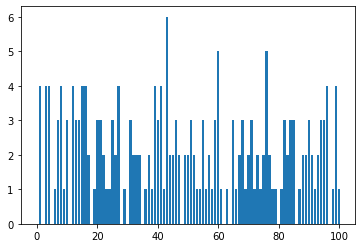

In [323]:
plt.bar(xs, ys)

In [324]:
num_points = len(num_friends)
num_points

204

In [325]:
largest_value = max(num_friends)
smallest_value = min(num_friends)

In [326]:
largest_value

100

In [327]:
smallest_value

1

In [328]:
sorted_values = sorted(num_friends)
sorted_values

[1,
 1,
 1,
 1,
 3,
 3,
 3,
 3,
 4,
 4,
 4,
 4,
 6,
 7,
 7,
 7,
 8,
 8,
 8,
 8,
 9,
 10,
 10,
 10,
 12,
 12,
 12,
 12,
 13,
 13,
 13,
 14,
 14,
 14,
 15,
 15,
 15,
 15,
 16,
 16,
 16,
 16,
 17,
 17,
 19,
 20,
 20,
 20,
 21,
 21,
 21,
 22,
 22,
 23,
 24,
 25,
 25,
 25,
 26,
 26,
 27,
 27,
 27,
 27,
 29,
 31,
 31,
 31,
 32,
 32,
 33,
 33,
 34,
 34,
 36,
 37,
 37,
 38,
 39,
 39,
 39,
 39,
 40,
 40,
 40,
 41,
 41,
 41,
 41,
 42,
 43,
 43,
 43,
 43,
 43,
 43,
 44,
 44,
 45,
 45,
 46,
 46,
 46,
 47,
 47,
 49,
 49,
 50,
 50,
 51,
 51,
 51,
 52,
 52,
 53,
 54,
 55,
 55,
 55,
 56,
 57,
 57,
 58,
 59,
 59,
 59,
 60,
 60,
 60,
 60,
 60,
 61,
 63,
 65,
 65,
 65,
 66,
 67,
 67,
 68,
 68,
 68,
 69,
 70,
 70,
 71,
 71,
 71,
 72,
 73,
 73,
 74,
 75,
 75,
 76,
 76,
 76,
 76,
 76,
 77,
 77,
 78,
 79,
 81,
 82,
 82,
 82,
 83,
 83,
 84,
 84,
 84,
 85,
 85,
 85,
 87,
 88,
 88,
 89,
 89,
 90,
 90,
 90,
 91,
 91,
 92,
 93,
 93,
 94,
 94,
 94,
 95,
 95,
 95,
 96,
 96,
 96,
 96,
 98,
 99,
 99,
 99,
 99,
 100]

In [329]:
smallest_value = sorted_values[0]
smallest_value 

1

In [330]:
second_smallest_value = sorted_values[1]
second_smallest_value 

1

In [331]:
second_largest_value = sorted_values[-2]
second_largest_value 

99

In [332]:
def mean(x):
    return sum(x) / len(x)

In [333]:
mean(num_friends)

48.67156862745098

In [334]:
def median(x):
    n = len(x)
    sorted_v = sorted(x)
    midpoint = n // 2
    
    if n % 2 == 1:
        return sorted_v[midpoint]
    else:
        lo = midpoint - 1
        hi = midpoint
        return (sorted_v[lo] + sorted_v[hi]) / 2

In [335]:
median(num_friends)

46.0

In [336]:
len([ x for x in num_friends if x >= 55.5])

85

In [337]:
len([ x for x in num_friends if x < 55.5])

119

<BarContainer object of 101 artists>

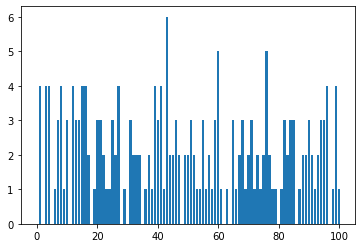

In [338]:
plt.bar(xs, ys)

In [339]:
def quantile(x, p):
    p_index = int(p * len(x))
    return sorted(x)[p_index]

In [340]:
quantile(num_friends, .1)

9

In [341]:
quantile(num_friends, .5)

46

In [342]:
def mode(x):
    counts = Counter(x)
    max_count = max(counts.values())
    return [x_i for x_i, count in counts.items() if count == max_count]

In [343]:
mode(num_friends)

[43]

In [344]:
def data_range(x):
    return max(x) - min(x)

In [345]:
data_range(num_friends)

99

In [346]:
def de_mean(x):
    x_bar = mean(x)
    return [x_i - x_bar for x_i in x]

In [347]:
def variance(x):
    n = len(x)
    deviations = de_mean(x)
    return sum_of_squares(deviations) / (n - 1)

In [348]:
variance(num_friends)

877.3546556553647

In [349]:
def standard_deviation(x):
    return math.sqrt(variance(x))

In [350]:
def interquartile_range(x):
    return quantile(x, 0.75) - quantile(x, 0.25)

In [351]:
# convariancia mede como duas variaveis variam em um conjunto de suas médias
def covariance(x, y):
    n = len(x)
    return dot(de_mean(x), de_mean(y)) / (n - 1)

In [361]:
def correlation(x, y):
    stdev_x = standard_deviation(x)
    stdev_y = standard_deviation(y)
    if stdev_x > 0 and stdev_y > 0:
        return covariance(x, y) / stdev_x / stdev_y
    else:
        return 0

In [370]:
num_friends = [100,49,41,40,25,21,21,19,19,18,18,16,15,15,15,15,14,14,13,13,13,13,12,12,11,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,8,8,8,8,8,8,8,8,8,8,8,8,8,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1]
daily_minutes = [1,68.77,51.25,52.08,38.36,44.54,57.13,51.4,41.42,31.22,34.76,54.01,38.79,47.59,49.1,27.66,41.03,36.73,48.65,28.12,46.62,35.57,32.98,35,26.07,23.77,39.73,40.57,31.65,31.21,36.32,20.45,21.93,26.02,27.34,23.49,46.94,30.5,33.8,24.23,21.4,27.94,32.24,40.57,25.07,19.42,22.39,18.42,46.96,23.72,26.41,26.97,36.76,40.32,35.02,29.47,30.2,31,38.11,38.18,36.31,21.03,30.86,36.07,28.66,29.08,37.28,15.28,24.17,22.31,30.17,25.53,19.85,35.37,44.6,17.23,13.47,26.33,35.02,32.09,24.81,19.33,28.77,24.26,31.98,25.73,24.86,16.28,34.51,15.23,39.72,40.8,26.06,35.76,34.76,16.13,44.04,18.03,19.65,32.62,35.59,39.43,14.18,35.24,40.13,41.82,35.45,36.07,43.67,24.61,20.9,21.9,18.79,27.61,27.21,26.61,29.77,20.59,27.53,13.82,33.2,25,33.1,36.65,18.63,14.87,22.2,36.81,25.53,24.62,26.25,18.21,28.08,19.42,29.79,32.8,35.99,28.32,27.79,35.88,29.06,36.28,14.1,36.63,37.49,26.9,18.58,38.48,24.48,18.95,33.55,14.24,29.04,32.51,25.63,22.22,19,32.73,15.16,13.9,27.2,32.01,29.27,33,13.74,20.42,27.32,18.23,35.35,28.48,9.08,24.62,20.12,35.26,19.92,31.02,16.49,12.16,30.7,31.22,34.65,13.13,27.51,33.2,31.57,14.1,33.42,17.44,10.12,24.42,9.82,23.39,30.93,15.03,21.67,31.09,33.29,22.61,26.89,23.48,8.38,27.81,32.35,23.84]

correlation(num_friends, daily_minutes)

0.24736957366478218

In [371]:
correlation(sorted(num_friends), sorted(daily_minutes))

0.7707671404049357

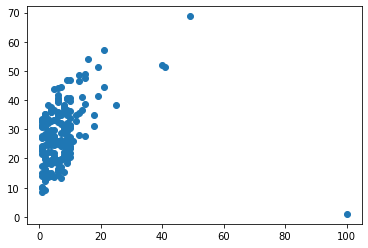

In [372]:
plt.scatter(num_friends, daily_minutes)

In [380]:
standard_deviation(num_friends) * 6

54.180868417394876

In [381]:
mean(num_friends)

7.333333333333333

(array([179.,  18.,   3.,   1.,   2.,   0.,   0.,   0.,   0.,   1.]),
 array([  1. ,  10.9,  20.8,  30.7,  40.6,  50.5,  60.4,  70.3,  80.2,
         90.1, 100. ]),
 <BarContainer object of 10 artists>)

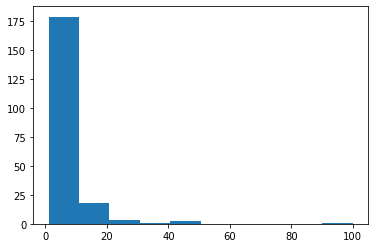

In [382]:
plt.hist(num_friends)

In [391]:
def criar_funcao_corte_outlier(metodo='6sigma'):
    """
    '6sigma', 'corte % minmax', '3sigma', 'outliercomum_boxplot'
    """
    lista_index_outlier = []
    pass

In [ ]:
# O que é o Paradoxo Simpson

## é quando as correlacões são 'descobertas' ao adicionar/retirar novas colunas ao 'estudo'.

## pode existir uma tendencia, mas quando esses dados são combinados essa tendência pode sumir



In [362]:
covariance([1, 2, 3, 4], [1, 2, 3, 4])

1.6666666666666667

In [364]:
covariance([1, 2, 3, 4], [10, 20, 30, 40])

16.666666666666668

In [369]:
covariance([1, 2, 3, 4], [10, 20, 30, 400])

196.66666666666666

In [366]:
correlation([1, 2, 3, 4], [1, 2, 3, 4])

1.0000000000000002

In [367]:
correlation([1, 2, 3, 4], [10, 20, 30, 40])

1.0000000000000002

In [368]:
correlation([1, 2, 3, 4], [10, 20, 30, 400])

0.8010361952965143

In [360]:
covariance([1, 1, 1, 1], [10, 10, 10, 10])

4.5

In [352]:
x_grande_positivo = [ 100 for i in range(100) ] + [ 0 for i in range(100) ]
x_pequeno_positivo = [ 1 for i in range(100) ] + [ 0 for i in range(100) ]
x_grande_negativo = [ -100 for i in range(100) ] + [ 0 for i in range(100) ]
x_pequeno_negativo = [ -1 for i in range(100) ] + [ 0 for i in range(100) ]

In [354]:
#x.std(), y.std()

In [355]:
x

('c', 30)

In [356]:
x[::-1]

(30, 'c')

In [357]:
import numpy as np
x = sorted(np.random.randint(100, 1000, 200))
y = x[::-1]# 1 / x
covariance(x, y)

-60636.20806532666

In [ ]:
x = (np.random.randint(100, 1000, 200))
x.sort()
y = x.copy() * -1
y.sort()
covariance(x, y)

In [ ]:
y[:5]

In [ ]:
x[:5]

In [ ]:
x = sorted(np.random.randint(100, 1000, 200))
y = x.copy()#[::-1]# 1 / x
y[-1] = -1e6
covariance(x, y)

In [ ]:
(x - x.mean())

In [ ]:
((y - y.mean()) * (x - x.mean())).sum()

In [ ]:
(x - x.mean()).dot(y-y.mean())

In [ ]:
covariance(x, y)

In [ ]:
covariance(x_grande_positivo, x_grande_negativo)

In [ ]:
covariance(x_pequeno_positivo, x_pequeno_negativo)

In [ ]:
covariance(x_grande_positivo, x_pequeno_negativo)

In [ ]:
covariance(x_grande_positivo, x_pequeno_negativo)

In [ ]:
def correlation(x, y):
    stdev_x = standard_deviation(x)
    stdev_y = standard_deviation(y)
    if stdev_x > 0 and stdev_y > 0:
        return covariance(x, y) / stdev_x / stdev_y
    else:
        return 0

In [ ]:
vermelhas = [4,5,6,4,3]
verdes = [8,6,5,4,3]

In [ ]:
pessoa1 = [ 1, 2]
pessoa2 = [10,20]
pessoa3 = [11,22]
pessoa4 = [14,24]

In [ ]:
import pandas as pd

In [ ]:
pd.DataFrame([
    pessoa1,
    pessoa2,
    pessoa3,
    pessoa4
]).cov()

In [ ]:
pd.DataFrame([
    pessoa2,
    pessoa1,
    pessoa4,
    pessoa3
]).cov()

In [ ]:
import numpy as np

In [ ]:
pd.DataFrame(
    [[1 for x in range(10)],
     np.random.rand(10)], index=['nao_varia', 'varia']
).T.cov()

In [ ]:
temp = pd.DataFrame(
    [[1 for x in range(10)],
     np.random.rand(10)], index=['nao_varia', 'varia']
).T

In [ ]:
temp.corr(method='kendall')

In [ ]:
temp.corr(method='spearman')

In [ ]:
temp.corr(method='pearson')

In [ ]:
import math

In [ ]:
standard_deviation([1 for i in range(10)])

In [ ]:
cov(vermelhas, verdes) == cov(sorted(vermelhas), verdes) 

In [ ]:
pd.DataFrame([[8,3,4,5], [3,3,4,7]], columns[])

# Paradoxo de Simpson 

- é um fenômeno em probabilidade e estatística , em que uma tendência aparece em diversos grupos de dados, mas desaparece ou reverte quando esses grupos são combinados.

- dados completos apontam para uma direção, mas uma análise de sub conjuntos apontam para outra

# Probabilidade

P(E) => Probabilidade do evento E

P(E, F) => P(E) * P(F)

P(E | F) => (P(E) * P(F)) / P(F)

P(E | F) => P(E, F) / P(F)

P(E) * P(F) => P(E | F) * P(F)

P(E, F) => P(E | F) * P(F)

(P(E) * P(F)) / P(F) => (P(E | F) * P(F)) / P(F)

P(E|F) => P(E)



In [ ]:
# P(duas criarncas sao meninas)
p(a) * p(a) = 1/4
p(p(a,a) | p(a)) = p(a,a) * p(a) / p(a)

In [3]:
(1/4 * 1/2) / (1/2)

0.25

In [ ]:
b = as duas crianças sao meninas
g = a mais velha é menina

p(b|g) = p(b, g) / p(g)

In [5]:
# p(b) * p(g)
((1/2 ) * (1/2)) / (1/2)

0.5

In [ ]:
p_coroa = 1/2
p_ambas_cara = 1/2 * 1/2


In [7]:
import random

In [8]:
def random_kid():
    return random.choice(['boy', 'girl'])

In [15]:
random_kid()

'girl'

In [16]:
both_girls = 0
older_girl = 0
either_girl = 0

In [17]:
random.seed(0)

In [19]:
for _ in range(10000):
    younger = random_kid()
    older = random_kid()
    
    if older == 'girl':
        # a crianca mais velha é uma menina
        older_girl += 1
        
    if older == 'girl' and younger == 'girl':
        # ambas as criancas sao meninas
        both_girls += 1
        
    if older == 'girl' or younger == 'girl':
        either_girl += 1


In [20]:
older_girl / 10000

0.4937

In [22]:
both_girls / 10000

0.2472

In [23]:
either_girl / 10000

0.7464

In [24]:
(1/4) / (1/2)

0.5

In [25]:
(1/4) / (3/4)

0.3333333333333333

In [1]:
import random

In [2]:
dado = [1,2,3,4,5,6]

In [5]:
random.choice(dado)

6

In [6]:
prob_1 = 0
prob_2 = 0
prob_3 = 0
prob_4 = 0
prob_5 = 0
prob_6 = 0

In [7]:
rodadas = 10000
for i in range(rodadas):
    sorteio_dado = random.choice(dado)
    if sorteio_dado == 1:
        prob_1 += 1
    if sorteio_dado == 2:
        prob_2 += 1
    if sorteio_dado == 3:
        prob_3 += 1
    if sorteio_dado == 4:
        prob_4 += 1
    if sorteio_dado == 5:
        prob_5 += 1
    if sorteio_dado == 1:
        prob_6 += 1

In [9]:
prob_1 / rodadas

0.1603

In [10]:
prob_2 / rodadas

0.1592

In [11]:
1/6

0.16666666666666666

In [12]:
prob_soma_5 = 0
rodadas = 10000
for i in range(rodadas):
    sorteio_dado_1 = random.choice(dado)
    sorteio_dado_2 = random.choice(dado)
    if sorteio_dado_1 + sorteio_dado_2 == 5:
        prob_soma_5 += 1
   

In [13]:
prob_soma_5 / rodadas

0.1112

In [15]:
4 / 36

0.1111111111111111

In [21]:
prob_soma_7 = 0
rodadas = 10000
for i in range(rodadas):
    sorteio_dado_1 = random.choice(dado)
    sorteio_dado_2 = random.choice(dado)
    if sorteio_dado_1 + sorteio_dado_2 == 7:
        prob_soma_7 += 1

In [22]:
prob_soma_7 / rodadas

0.1664

In [20]:
6 / 36

0.16666666666666666

In [37]:
prob_soma_1_dado_2 = 0
dado_cair_2 = 0
dado_cair_1 = 0
rodadas = 1000000
for i in range(rodadas):
    sorteio_dado_1 = random.choice(dado)
    sorteio_dado_2 = random.choice(dado)
    if sorteio_dado_2 == 2:
        dado_cair_2 += 1
    if sorteio_dado_2 == 2 and  sorteio_dado_1 == 1:
        prob_soma_1_dado_2 += 1
    if sorteio_dado_1 == 1:
        dado_cair_1 += 1

In [38]:
prob_soma_1_dado_2 / dado_cair_2

0.16764711162709978

In [39]:
dado_cair_1 / rodadas

0.166846

In [40]:
epsilon = 0.01

In [41]:
if abs((prob_soma_1_dado_2 / dado_cair_2) - dado_cair_1 / rodadas) < epsilon:
    print('sao iguais')

sao iguais


In [47]:
dado_soma_12 = 0
dado_cair_2 = 0
dado_cair_1 = 0
rodadas = 1000000
for i in range(rodadas):
    sorteio_dado_1 = random.choice(dado)
    sorteio_dado_2 = random.choice(dado)
    if sorteio_dado_1 + sorteio_dado_2 == 12:
        dado_soma_12 += 1
    if sorteio_dado_1 == 6:
        dado_cair_1 += 1

In [48]:
dado_soma_12 / dado_cair_1

0.16780965375270787

In [46]:
dado_soma_12 / rodadas

0.027648

In [45]:
(1 / 36) / (1/6)

0.16666666666666666

In [ ]:
P(rain | clouds ) = (P(clouds | rain) * P(rain)) / P(clouds)

In [ ]:
P(rain | clouds ) = (P(clouds | rain) * P(rain)) / P(clouds)

In [1]:
(0.80 * .10) / .40

0.20000000000000004

In [2]:
(0.80 * .10)

0.08000000000000002

In [3]:
0.2 * 0.4

0.08000000000000002

In [ ]:
P(clouds | rain) = 0.8
P(rain | clouds ) = 0.2
P(rain) = 0.1
P(clouds) = 0.4

In [4]:
# P(clouds | rain) * P(rain)
0.8 * 0.1

0.08000000000000002

In [5]:
# P(clouds | rain) * P(-rain)
0.8 * 0.9

0.7200000000000001

In [ ]:
P(rain | clouds ) = (P(clouds | rain) * P(rain)) / P(clouds)

P(clouds | -rain) = P(-rain | clouds) * P(-clouds) / 

In [6]:
import numpy as np

In [10]:
np.array([.4, .6]).reshape(2,1).dot(np.array([0.1,0.9]).reshape(1,2))

array([[0.04, 0.36],
       [0.06, 0.54]])

In [12]:
np.array([.4, .6]).reshape(2,1).dot(np.array([0.1,0.9]).reshape(1,2)).sum()

1.0

# Distribuições contínuas

- Funcao de densidade de probabilidade

Uma função que gera a probabilidade em um certo intervalo. 

In [60]:
def uniform_pdf(x):
    return 1 if (x >= 0 and x < 1) else 0

In [61]:
uniform_pdf(-2)

0

In [62]:
uniform_pdf(1)

0

- Funcao de distribuicao cumulativa

In [63]:
def uniform_cdf(x):
    """retorna a probabilidade de uma variável aleatória unifrma ser <= x"""
    if x < 0:   return 0
    elif x < 1: return x
    else:       return 1

In [64]:
uniform_cdf(0.4)

0.4

In [65]:
uniform_cdf(1)

1

In [66]:
uniform_cdf(0)

0

In [67]:
uniform_cdf(4)

1

In [68]:
import matplotlib.pyplot as plt
import numpy as np

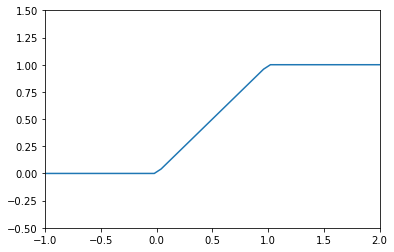

In [69]:
x = np.linspace(-1, 2, 50)
plt.ylim(-0.5, 1.5)
plt.xlim(-1, 2)
plt.plot(x, [ uniform_cdf(v) for v in x]);

# Distribuição Normal



In [70]:
def normal_pdf(x, mu=0, sigma=1):
    sqrt_two_pi = math.sqrt(2 * math.pi)
    return (math.exp(-(x-mu) ** 2 / 2 / sigma ** 2) / (sqrt_two_pi * sigma))

In [71]:
import math

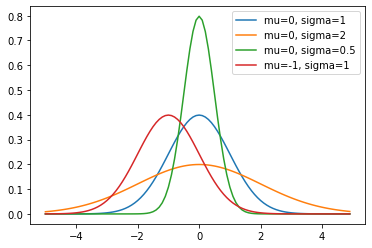

In [72]:
xs = [x/10 for x in range(-50, 50)]
plt.plot(xs, [normal_pdf(x, sigma=1) for x in xs], '-', label='mu=0, sigma=1')
plt.plot(xs, [normal_pdf(x, sigma=2) for x in xs], '-', label='mu=0, sigma=2')
plt.plot(xs, [normal_pdf(x, sigma=0.5) for x in xs], '-', label='mu=0, sigma=0.5')
plt.plot(xs, [normal_pdf(x, mu=-1) for x in xs], '-', label='mu=-1, sigma=1')
plt.legend()

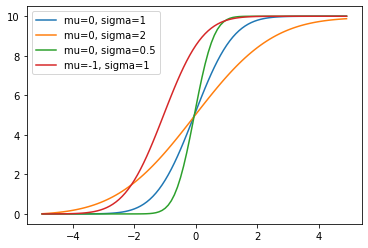

In [73]:
plt.plot(xs, np.cumsum([normal_pdf(x, sigma=1) for x in xs]), '-', label='mu=0, sigma=1')
plt.plot(xs, np.cumsum([normal_pdf(x, sigma=2) for x in xs]), '-', label='mu=0, sigma=2')
plt.plot(xs, np.cumsum([normal_pdf(x, sigma=0.5) for x in xs]), '-', label='mu=0, sigma=0.5')
plt.plot(xs, np.cumsum([normal_pdf(x, mu=-1) for x in xs]), '-', label='mu=-1, sigma=1')
plt.legend()

In [74]:
# https://en.wikipedia.org/wiki/Error_function
def normal_cdf(x, mu=0, sigma=1):
    return (1 + math.erf((x - mu) / math.sqrt(2) / sigma)) / 2

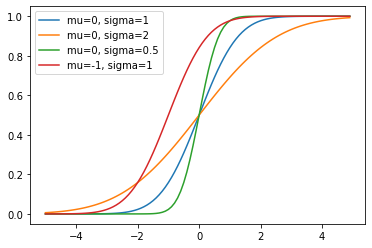

In [75]:
xs = [x/10 for x in range(-50, 50)]
plt.plot(xs, [normal_cdf(x, sigma=1) for x in xs], '-', label='mu=0, sigma=1')
plt.plot(xs, [normal_cdf(x, sigma=2) for x in xs], '-', label='mu=0, sigma=2')
plt.plot(xs, [normal_cdf(x, sigma=0.5) for x in xs], '-', label='mu=0, sigma=0.5')
plt.plot(xs, [normal_cdf(x, mu=-1) for x in xs], '-', label='mu=-1, sigma=1')
plt.legend()

In [76]:
z = zip(np.cumsum([normal_pdf(x, sigma=1) for x in xs]), 
        [normal_cdf(x, sigma=1) for x in xs])



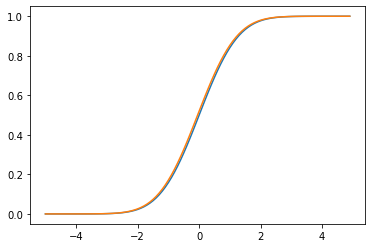

In [77]:
plt.plot(xs, [normal_cdf(x, sigma=1) for x in xs], '-', label='mu=0, sigma=1')
plt.plot(xs, np.cumsum([normal_pdf(x, sigma=1)/10 for x in xs]), '-', label='mu=0, sigma=1')

In [78]:
# VF = VP * (1 + i)**p
# 12_000 = 10_000 * (1 + i)**3

In [79]:
# temos que intuir um número mínimo do i
# temos que intuir um número máximo do i

## vamos abstrair que o i está entre 0 e 1
## esse dominio deve ser sequencial

In [80]:
def funcao_objetivo(i):
    return 10_000 * (1 + i)**3

In [81]:
funcao_objetivo(0.0001)

10003.000300009999

In [82]:
inicial = 0.0000001
contar = 0
while funcao_objetivo(inicial) < 12_000:
    inicial += 0.0000001
    contar += 1

In [83]:
funcao_objetivo(inicial)

12000.001044036017

In [84]:
inicial

0.06265860000077185

In [85]:
contar

626585

In [86]:
# 20 - 50
# 620
# 15 - 20
# 10
# 5

In [87]:
minimo = 0
maximo = 1
medio = (maximo + minimo) / 2

In [88]:
medio

0.5

In [89]:
funcao_objetivo(medio)

33750.0

In [90]:
[minimo, medio], [medio, maximo]

([0, 0.5], [0.5, 1])

In [91]:
# como ele passou o valor, ele se encontra entre o minimo e o médio
# como isso ocorreu, temos que definir o novo máximo e o novo médio
maximo = medio
medio = (maximo + minimo) / 2

In [92]:
medio

0.25

In [93]:
[minimo, medio], [medio, maximo]

([0, 0.25], [0.25, 0.5])

In [94]:
funcao_objetivo(medio)

19531.25

In [95]:
maximo = medio
medio = (maximo + minimo) / 2

In [96]:
funcao_objetivo(medio)

14238.28125

In [97]:
[minimo, medio], [medio, maximo]

([0, 0.125], [0.125, 0.25])

In [98]:
maximo = medio
medio = (maximo + minimo) / 2

In [99]:
funcao_objetivo(medio)

11994.62890625

In [100]:
[minimo, medio], [medio, maximo]

([0, 0.0625], [0.0625, 0.125])

In [101]:
minimo = medio
medio = (maximo + minimo) / 2

In [102]:
funcao_objetivo(medio)

13084.41162109375

In [103]:
[minimo, medio], [medio, maximo]

([0.0625, 0.09375], [0.09375, 0.125])

In [104]:
minimo = medio
medio = (maximo - minimo) / 2

In [105]:
funcao_objetivo(medio)

10476.112365722656

In [106]:
# conceito: epsilon
epsilon = 0.009999

In [107]:
abs(funcao_objetivo(medio) - 12_000) > epsilon

True

In [108]:
minimo = 0
maximo = 1
medio = (maximo - minimo) / 2
contar = 0

while abs(funcao_objetivo(medio) - 12_000) > epsilon:
    print(f'resultado: {funcao_objetivo(medio)}')
    contar += 1
    #if contar > 50:
    #    break
    
    if funcao_objetivo(medio) > 12_000:
        print('mudou o maximo')
        print('antes')
        print(f'minimo: {minimo}, medio: {medio}, maximo: {maximo}')
       # medio = (maximo + minimo) / 2
        maximo = medio
        medio = (maximo + minimo) / 2
        print('depois')
        print(f'minimo: {minimo}, medio: {medio}, maximo: {maximo}')
        
    else:
        print('mudou o minimo')
        print('antes')
        print(f'minimo: {minimo}, medio: {medio}, maximo: {maximo}')
       # medio = (maximo + minimo) / 2
        minimo = medio
        medio = (maximo + minimo) / 2
        print('depois')
        print(f'minimo: {minimo}, medio: {medio}, maximo: {maximo}')
    print()
    print()

resultado: 33750.0
mudou o maximo
antes
minimo: 0, medio: 0.5, maximo: 1
depois
minimo: 0, medio: 0.25, maximo: 0.5


resultado: 19531.25
mudou o maximo
antes
minimo: 0, medio: 0.25, maximo: 0.5
depois
minimo: 0, medio: 0.125, maximo: 0.25


resultado: 14238.28125
mudou o maximo
antes
minimo: 0, medio: 0.125, maximo: 0.25
depois
minimo: 0, medio: 0.0625, maximo: 0.125


resultado: 11994.62890625
mudou o minimo
antes
minimo: 0, medio: 0.0625, maximo: 0.125
depois
minimo: 0.0625, medio: 0.09375, maximo: 0.125


resultado: 13084.41162109375
mudou o maximo
antes
minimo: 0.0625, medio: 0.09375, maximo: 0.125
depois
minimo: 0.0625, medio: 0.078125, maximo: 0.09375


resultado: 12531.623840332031
mudou o maximo
antes
minimo: 0.0625, medio: 0.078125, maximo: 0.09375
depois
minimo: 0.0625, medio: 0.0703125, maximo: 0.078125


resultado: 12261.1665725708
mudou o maximo
antes
minimo: 0.0625, medio: 0.0703125, maximo: 0.078125
depois
minimo: 0.0625, medio: 0.06640625, maximo: 0.0703125


resultado

In [109]:
contar

18

In [117]:
def inverse_normal_cdf(p, mu=0, sigma=1, tolerance=0.00001):
    
    # se não for padrão, computa o padrão e redimensiona
    if mu != 0 or sigma != 1:
        return mu + sigma * inverse_normal_cdf(p, tolerance=tolerance)
    
    low_z, low_p = -10.00, 0
    hi_z, hi_p = 10.00, 1
    while hi_z - low_z > tolerance:
        mid_z = (low_z + hi_z) / 2
        mid_p = normal_cdf(mid_z)
        if mid_p < p:
            # o ponto do meio ainda está baixo, procura acima
            low_z, low_p = mid_z, mid_p
        elif mid_p > p:
            # o ponto do meio ainda está alto, procura abaixo
            hi_z, hi_p = mid_z, mid_p
        else:
            break
            
    return mid_z

In [114]:
normal_cdf(0.33, mu=0, sigma=1)

0.6293000189406535

In [118]:
inverse_normal_cdf(0.6293000189406535, mu=0, sigma=1)

0.3299999237060547

In [119]:
# a pessoa tem que tirar acima de 85 pontos para ser aprovada
# isso leva em consideração a média e o desvio padrão
inverse_normal(0.95, mu=75, sigma=6.5)

85.69152355194092

In [120]:
inverse_normal(0.8, mu=75, sigma=6.5)

80.47057628631592

# Teorema do Limite Central

In [123]:
import random

In [124]:
def bernoulli_trial(p):
    return 1 if random.random() < p else 0

In [148]:
bernoulli_trial(0.1)

1

In [166]:
bernoulli_trial(0.9)

0

In [167]:
def binomial(n, p):
    return sum(bernoulli_trial(p) for _ in range(n))

In [168]:
alunos = [random.randint(5,10) for _ in range(20)]

In [169]:
alunos

[10, 8, 8, 9, 8, 5, 7, 5, 5, 10, 6, 5, 7, 8, 5, 7, 6, 9, 5, 5]

In [170]:
len(alunos)

20

In [171]:
def criar_notas(n):
    return [random.randint(5,10) for _ in range(n)]

In [173]:
alunos = criar_notas(40)
sum(alunos) / len(alunos)

7.5

In [179]:
binomial(100, 0.3)

36

In [180]:
bernoulli_trial(0.3)

0

In [185]:
binomial(1000000, 0.3)

300321

In [192]:
tentativas = 10000000
binomial(tentativas, 0.3) / tentativas

0.3002749

In [243]:
# qual a probabilidade de uma moeda honesta cair 60 vezes em 100 tentativas?
tentativas = 100
binomial(tentativas, 0.6)

60

In [195]:
import numpy as np

In [194]:
inverse_normal(0.6, mu=0, sigma=1)

0.2533435821533203

In [245]:
azar = 0
tentativas = int(1e7)
for i in range(tentativas):
    cara = np.random.choice([1,0], size=100, p=(.5, .5))
    if sum(cara) >= 60:
        # add sigma
        # add mu
        azar += 1

In [247]:
azar / tentativas

0.0285014

In [239]:
azar

28395

In [246]:
inverse_normal(0.977, mu=50, sigma=5)

59.977006912231445

In [241]:
normal_cdf(60, mu=50, sigma=5)

0.9772498680518208

In [260]:
1 - normal_cdf(59.5, mu=50, sigma=5)

0.028716559816001852